In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    get_runs,
    plot_for_each_level
)

In [3]:
runs = get_runs()

# Análise Geral dos Dados

## Distribuição das execuções (runs)

In [4]:
#print(runs.info())

num_execucoes = runs.shape[0]
print(f"Número de execuções: {num_execucoes}")

num_execucoes_completas = runs[runs['is_completed'] == 1].shape[0]
num_execucoes_nao_completas = runs[runs['is_completed'] == 0].shape[0]
print(f"Número de execuções completas: {num_execucoes_completas}, número de execuções não completas: {num_execucoes_nao_completas}")

Número de execuções: 305
Número de execuções completas: 234, número de execuções não completas: 71


In [5]:
def print_run_qnt(df, level):
    print(f"Nível: {level}")
    num_execucoes = df.shape[0]
    print(f"Número de execuções: {num_execucoes}")

    num_execucoes_completas = df[df['is_completed'] == 1].shape[0]
    num_execucoes_nao_completas = df[df['is_completed'] == 0].shape[0]
    print(f"Número de execuções completas: {num_execucoes_completas}, número de execuções não completas: {num_execucoes_nao_completas}")

plot_for_each_level(runs, print_run_qnt)

Nível: 0
Número de execuções: 156
Número de execuções completas: 127, número de execuções não completas: 29
Nível: 1
Número de execuções: 116
Número de execuções completas: 85, número de execuções não completas: 31
Nível: 2
Número de execuções: 33
Número de execuções completas: 22, número de execuções não completas: 11


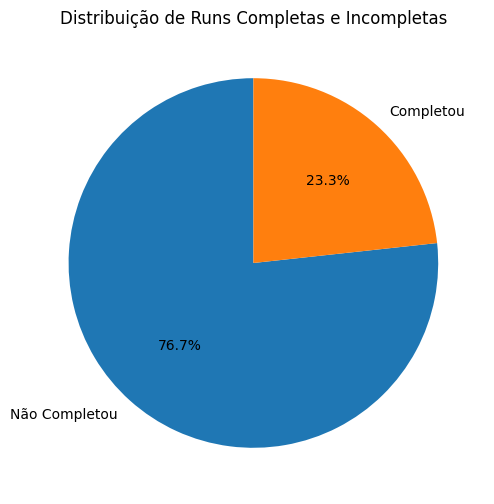

In [6]:
completion_counts = runs['is_completed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(completion_counts, labels=['Não Completou', 'Completou'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Runs Completas e Incompletas')
plt.savefig('./figs/completion_distribution_pie.png', dpi=96, bbox_inches='tight')
plt.show()

## Número de inimigos e obstáculos por nível

objects_analysis.ipynb

## Tempo de jogo

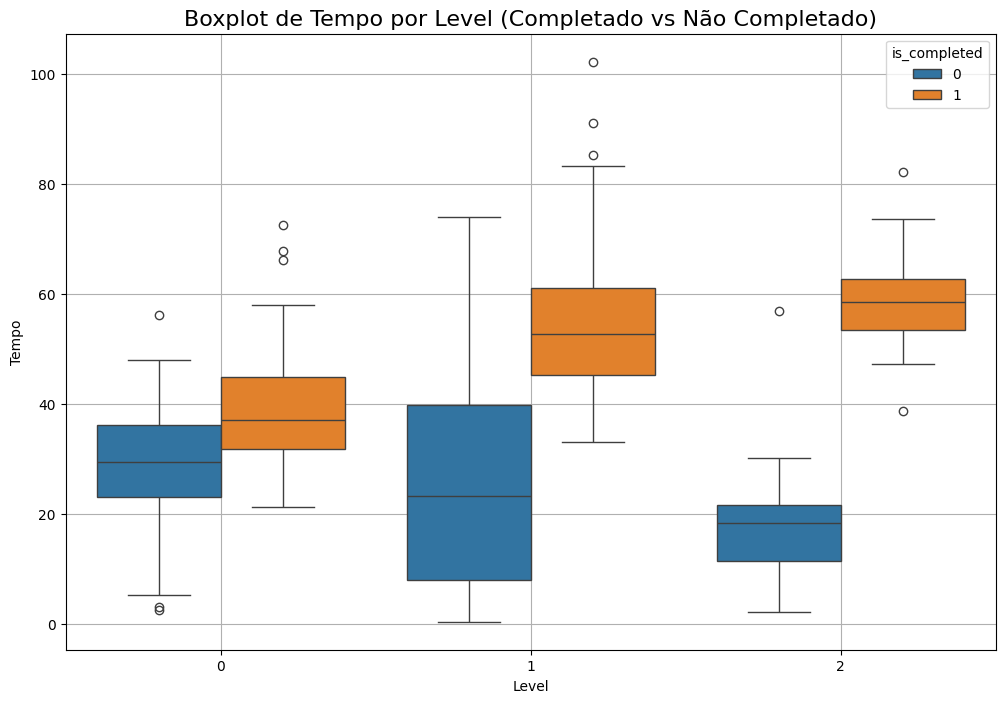

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', y='time', hue='is_completed', data=runs, dodge=True)
plt.xlabel('Level')
plt.ylabel('Tempo')
plt.grid()
plt.title('Boxplot de Tempo por Level (Completado vs Não Completado)', fontsize=16)
plt.savefig('./figs/completion_time_levels.png', dpi=96, bbox_inches='tight')
plt.show()

## Vida perdida

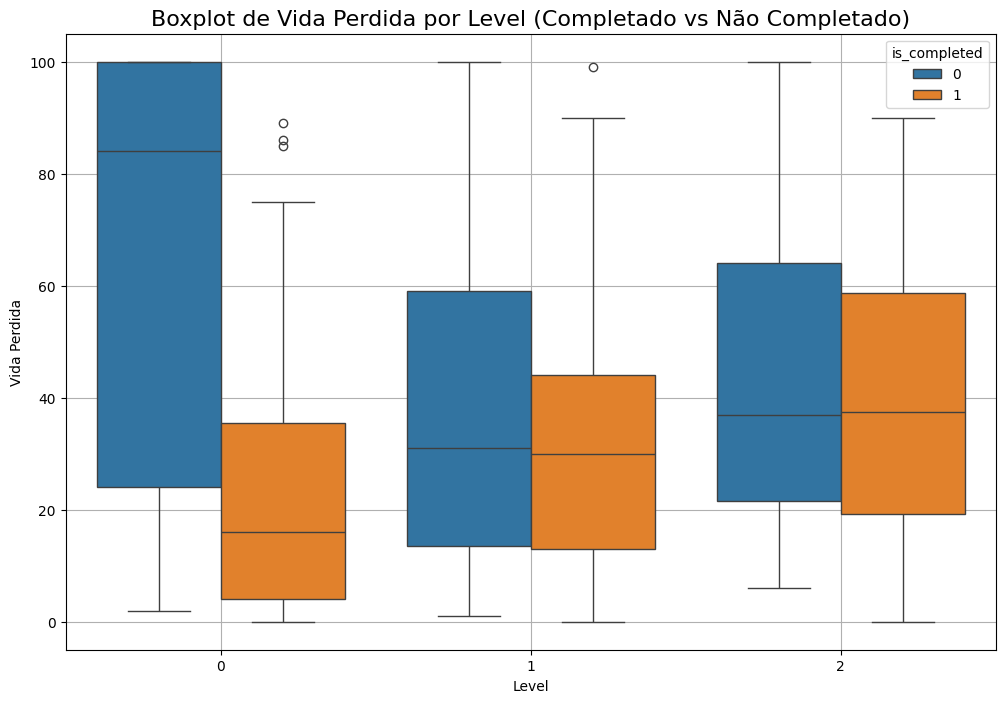

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', y='lostLife', hue='is_completed', data=runs, dodge=True)
plt.xlabel('Level')
plt.ylabel('Vida Perdida')
plt.grid()
plt.title('Boxplot de Vida Perdida por Level (Completado vs Não Completado)', fontsize=16)
plt.savefig('./figs/completion_lost_life_levels.png', dpi=96, bbox_inches='tight')
plt.show()

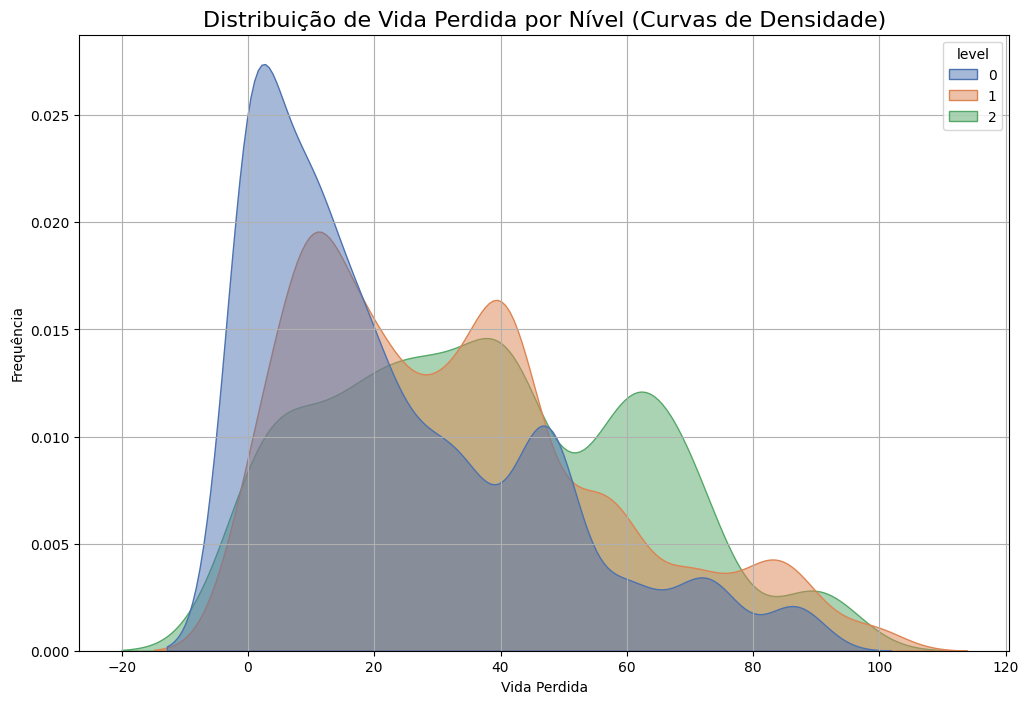

In [11]:
plt.figure(figsize=(12, 8))

sns.kdeplot(
	data=runs[runs['is_completed'] == 1],
	x='lostLife',
	hue='level',
	common_norm=False,
	fill=True,
	alpha=0.5,
	palette='deep',
	bw_adjust=0.5
)

plt.xlabel('Vida Perdida')
plt.ylabel('Frequência')
plt.title('Distribuição de Vida Perdida por Nível (Curvas de Densidade)', fontsize=16)
plt.grid()
plt.savefig('./figs/completion_lost_life_levels_kde.png', dpi=96, bbox_inches='tight')
plt.show()

# Eficiência do Algoritmo Genético

Evolução das iterações: generated_rooms_analysis.ipynb

Variáveis de fitness: fitness_vars_analysis.ipynb

# Análise do Comportamento do Jogador

Desempenho por nível e feedback

Mortalidade vs dificuldade

# Comparação entre Níveis

Distribuição de recursos

Impacto no jogador